# Malaria Cell Images Dataset

## Content

The dataset contains 2 folders

* Infected
* Uninfected
And a total of 27,558 images.

## Acknowledgements
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/
And uploaded here, so anybody trying to start working with this dataset can get started immediately, as to download the
dataset from NIH website is quite slow.
Photo by Егор Камелев on Unsplash
https://unsplash.com/@ekamelev

## Inspiration
Save humans by detecting and deploying Image Cells that contain Malaria or not!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

from PIL import Image

import os
print(os.listdir("../input/cell-images-for-detecting-malaria/cell_images"))

['Parasitized', 'Uninfected', 'cell_images']


### Set image size

In [2]:
width = 128
height = 128

### Let's have a look at our data

In [3]:
infected_folder = '../input/cell-images-for-detecting-malaria/cell_images/Parasitized/'
uninfected_folder  = '../input/cell-images-for-detecting-malaria/cell_images/Uninfected/'

In [4]:
print(len(os.listdir(infected_folder)))
print(len(os.listdir(uninfected_folder)))

13780
13780


## Let's have a look at our data

In [5]:
# Infected cell image
rand_inf = np.random.randint(0,len(os.listdir(infected_folder)))
inf_pic = os.listdir(infected_folder)[rand_inf]

#Uninfected cell image
rand_uninf = np.random.randint(0,len(os.listdir(uninfected_folder)))
uninf_pic = os.listdir(uninfected_folder)[rand_uninf]

# Load the images
inf_load = Image.open(infected_folder+inf_pic)
uninf_load = Image.open(uninfected_folder+uninf_pic)

Text(0.5, 1.0, 'Uninfected cell')

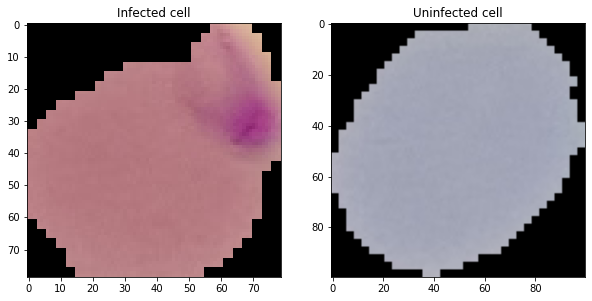

In [6]:
# Let's plt these images
f = plt.figure(figsize= (10,6))

a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(inf_load)
a1.set_title('Infected cell')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(uninf_load)
a2.set_title('Uninfected cell')

## Dividing data in train and test

In [7]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

### Train Data

In [8]:
trainDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


### Validation Data

In [9]:
valDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


## Model

We will create a CNN model where we will put 128x128 image with 3 channels(RGB) and will get a result as Infected or Uninfected.

In [10]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

## Compile Model

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
cnn_model = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =20,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen))

Epoch 1/20
1378/1378 [==============================] - 107s 78ms/step - loss: 0.5049 - accuracy: 0.7332 - val_loss: 0.1742 - val_accuracy: 0.9334
Epoch 2/20
1378/1378 [==============================] - 46s 33ms/step - loss: 0.1827 - accuracy: 0.9427 - val_loss: 0.1584 - val_accuracy: 0.9448
Epoch 3/20
1378/1378 [==============================] - 47s 34ms/step - loss: 0.1616 - accuracy: 0.9514 - val_loss: 0.1635 - val_accuracy: 0.9417
Epoch 4/20
1378/1378 [==============================] - 46s 33ms/step - loss: 0.1477 - accuracy: 0.9554 - val_loss: 0.1662 - val_accuracy: 0.9434
Epoch 5/20
1378/1378 [==============================] - 47s 34ms/step - loss: 0.1388 - accuracy: 0.9572 - val_loss: 0.1682 - val_accuracy: 0.9483
Epoch 6/20
1378/1378 [==============================] - 47s 34ms/step - loss: 0.1326 - accuracy: 0.9590 - val_loss: 0.1872 - val_accuracy: 0.9417
Epoch 7/20
1378/1378 [==============================] - 48s 35ms/step - loss: 0.1314 - accuracy: 0.9583 - val_loss: 0.1830 

#### Accuracy

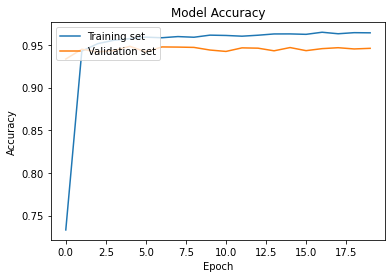

In [13]:
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

#### Loss

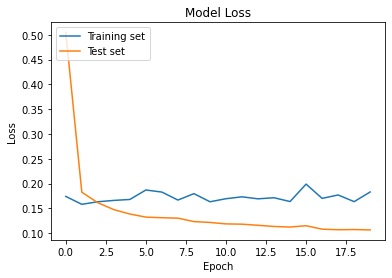

In [14]:
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()